Binary Classification: 
using diabetes data originally collected by the ntional Institute of Diabetes and Digestive and Kidney Diseases, lets predict whether or not a patient has diabetes

In [ ]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, recall_score, confusion_matrix


In [ ]:

# import dataset 

diabetes= pd.read_csv("C:/Users/kezen/OneDrive/Documents/Microsoft/data/diabetes.csv", delimiter=",", header="infer")

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
x = diabetes[features].values 
y =diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(x[n]), "\n  Label:", y[n])


In [ ]:
# Exploratory data analysis 
print(diabetes.describe())

# check for missing values 
diabetes.isna().sum() # no missing values 

# visualise data
for col in features:
    diabetes.boxplot(column= col, by = "Diabetic", figsize= (7,7))
    plt.title(col)
plt.show()

The above boxplots suggest marked difference in the distribution for each label (diabetic) values. 
Pregnancies, Age and BMI disrtibution show marked difference for diabteic patient than non diabetic patients. These features are likely to be important in predicting whether or not a patient is diabetic 

In [38]:
import plotly.express as px

px.histogram(diabetes, "Age", color= "Diabetic", facet_col= "Diabetic", title="Distribution of age by diabetic") # marked difference on a patient having diabetes by age


In [40]:
#create agegroup column from the age column
def age_function(x):
    if x < 18:
        return "Child"
    elif x >=18 and x <= 65:
        return "Adult"
    else: 
        return "Elderly"
diabetes["AgeGroup"] = diabetes.Age.apply(age_function)

px.histogram(diabetes, "AgeGroup", color= "Diabetic", barmode= "group")

In [48]:
# visualise BMI
px.histogram(diabetes, "BMI", color= "Diabetic", facet_col= "Diabetic")
# create range of BMI
def bmi_function(x):
    if x < 18.5:
        return "Underweight"
    elif x >= 18.5 and x < 25:
        return "Healthy"
    elif x >= 25 and x < 30:
        return "Overweight"
    else:
        return "Obese"
diabetes["BmiRange"] = diabetes.BMI.apply(bmi_function)
px.histogram(diabetes, "BmiRange", color= "Diabetic", facet_col= "Diabetic") # patients that are obese and overweight tends to be diabteic

In [49]:
# Modelling
# split data 70% to training and test dataset: 70% to training and 30% to testing dataset 
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100) # random_state ensures reproducibility

# fit logistic regression model 
model = LogisticRegression().fit(x_train, y_train)

# make predictions on the test data set 
predictions = model.predict(x_test)

# create dataframe of actual vs predicted values 
df = pd.DataFrame({
  "actual_values": y_test,
  "predicted_values": predictions  
})
print(df.head(10))


   actual_values  predicted_values
0              0                 0
1              0                 0
2              0                 0
3              0                 0
4              0                 0
5              1                 1
6              0                 0
7              0                 0
8              1                 1
9              0                 0


C:\Users\kezen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Classification Metrics 
AUC score: qualifies the overall performance
Accuracy: This is the proportion of the label data (diabetic) that model predicted correctly 
Recall: is the ability of the model to identify all the true positives i.e the percentage of patients that are diabetic that were correctly identified 
Precision: of all the patients that the model predicted are diabetic, how many are actually diabetic

In [50]:
# evaluate model performance 
accuracy = np.round(accuracy_score(y_test, predictions), 2)
recall = np.round(recall_score(y_test, predictions), 2)
precision = np.round(precision_score(y_test, predictions), 2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")



Accuracy: 0.77
Recall: 0.55
Precision: 0.69


Definition of classification metrics


Given a recall of 0.55, it means that the model ability to correctly identify patients that are actually diabetic is just over 50%

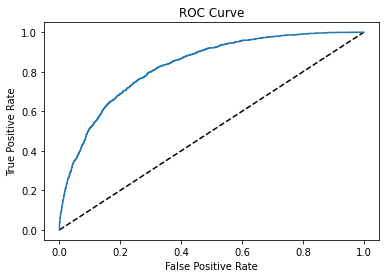

In [51]:
# plot the ROC Curve
#ROC Curve shows the curve of the true and false positive rates.

from sklearn.metrics import roc_curve, roc_auc_score
# get probailities of th predictions 
y_scores  = model.predict_proba(x_test)

# calculate the ROC Curve 
fpr, tpr, thresholds = roc_curve(y_true= y_test, y_score= y_scores[:,1])
# plot the 50% diagonal line 
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

The ideal ROC curve hugs the top left corner, indicating a high true positive
rate and a low false positive rate. The dotted line represents the “no information”
classifier; this is what we would expect if the predictors are not associated with probaility of having diabetes 

# Finally, we can get the AUC score which is between 0 and 1. qualifies the overall performance. The closer to 1, the better the model 

In [52]:
auc_score = np.round(roc_auc_score(y_test, y_scores[:,1]),2)
print(f"\nAccuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"AUC: {auc_score}")




Accuracy: 0.77
Recall: 0.55
Precision: 0.69
AUC: 0.83
